# MNIST

In [1]:
import torch
import torchvision 

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(), # Automatically scales the image to [0, 1]
    torchvision.transforms.Normalize((0.5,), (0.5,)) # Normalize to [-1, 1]
])

dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)


dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

classes = list(range(10))

torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(0.9922)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)


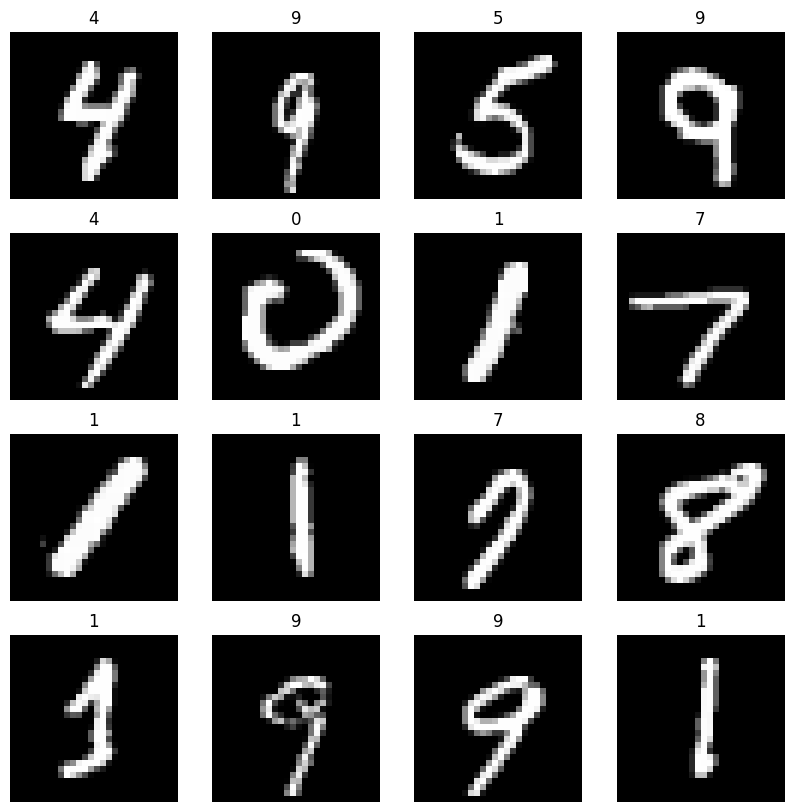

In [ ]:
# Plot some training images with labels
import numpy as np
import matplotlib.pyplot as plt

# 4x4 grid of images

fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        image, label = dataset[np.random.randint(0, len(dataset))]
        axs[i, j].imshow(image.squeeze().numpy(), cmap='gray')
        axs[i, j].set_title(classes[label])
        axs[i, j].axis('off')
        
plt.show()

In [26]:
# Define the model
import torch.nn as nn
import torch.nn.functional as F

class FCNN(nn.Module):
    def __init__(self, hidden_size=128, layers=2):
        super(FCNN, self).__init__()
        self.input_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, hidden_size),
            nn.ReLU()
        )
        self.backbone = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(layers)])
        self.output_layer = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.backbone:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x
    
class CNN(nn.Module):
    def __init__(self, hidden_size=8, layers=1):
        super(CNN, self).__init__()
        self.input_layer = nn.Conv2d(1, hidden_size, 3, padding="same")
        self.backbone = nn.ModuleList([nn.Conv2d(hidden_size, hidden_size, 3, padding="same") for _ in range(layers)])
        self.output_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28*hidden_size, 10)
        )
        
    def forward(self, x):
        x = F.relu(self.input_layer(x))
        for layer in self.backbone:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x

In [27]:
# Train the model

model = CNN()
# model = FCNN()

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    running_loss = 0.0
    for i, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(images)
        loss = F.cross_entropy(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 100 == 0:
            print(f"Epoch {epoch}, Iteration {i}, Loss {running_loss / 100}")
            running_loss = 0.0

Epoch 0, Iteration 0, Loss 0.022952513694763185
Epoch 0, Iteration 100, Loss 0.7462281213700771
Epoch 0, Iteration 200, Loss 0.28371416330337523
Epoch 0, Iteration 300, Loss 0.21588062655180693
Epoch 0, Iteration 400, Loss 0.16666984766721726
Epoch 0, Iteration 500, Loss 0.16273856673389672
Epoch 0, Iteration 600, Loss 0.1385645400173962
Epoch 0, Iteration 700, Loss 0.11793510394170881
Epoch 0, Iteration 800, Loss 0.10867717155255377
Epoch 0, Iteration 900, Loss 0.09193054935894907
Epoch 1, Iteration 0, Loss 0.0015004992485046387
Epoch 1, Iteration 100, Loss 0.09075814431533218
Epoch 1, Iteration 200, Loss 0.08451644225046039
Epoch 1, Iteration 300, Loss 0.0863669349742122
Epoch 1, Iteration 400, Loss 0.08704153415281325
Epoch 1, Iteration 500, Loss 0.09825916054658591
Epoch 1, Iteration 600, Loss 0.0703450230276212
Epoch 1, Iteration 700, Loss 0.0836772318277508
Epoch 1, Iteration 800, Loss 0.07764869133010506
Epoch 1, Iteration 900, Loss 0.0745743540301919
Epoch 2, Iteration 0, Loss 

In [28]:
# Save the model
torch.save(model.state_dict(), "model.pth")

C:\Users\berti\AppData\Local\Temp\ipykernel_20548\1446280971.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


Accuracy: 0.9839
Accuracy of 0: 0.9908163265306122
Accuracy of 1: 0.9947136563876652
Accuracy of 2: 0.9699612403100775
Accuracy of 3: 0.996039603960396
Accuracy of 4: 0.9877800407331976
Accuracy of 5: 0.9865470852017937
Accuracy of 6: 0.9853862212943633
Accuracy of 7: 0.9883268482490273
Accuracy of 8: 0.9722792607802875
Accuracy of 9: 0.9663032705649157


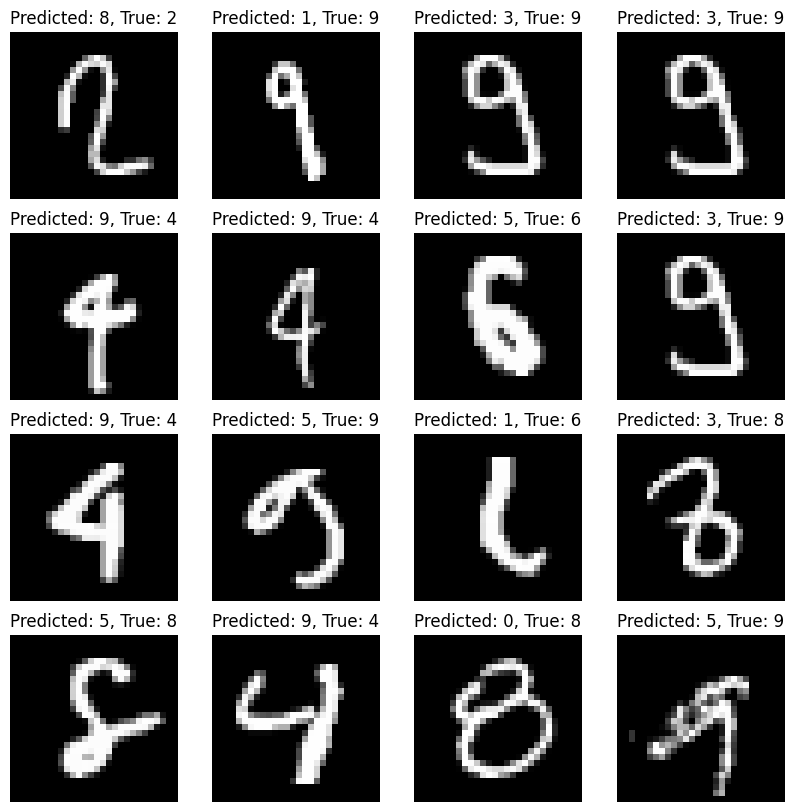

In [29]:
# Load the model
model.load_state_dict(torch.load("model.pth"))

# Evaluate the model
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f"Accuracy: {correct / total}")

# Accuracy per class
class_correct = list(0. for _ in range(10))
class_total = list(0. for _ in range(10))

with torch.no_grad():
    for images, labels in test_dataloader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print(f"Accuracy of {classes[i]}: {class_correct[i] / class_total[i]}")
    

# Generate a grid of images which are misclassified

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        while True:
            image, label = test_dataset[np.random.randint(0, len(test_dataset))]
            output = model(image.unsqueeze(0))
            _, predicted = torch.max(output, 1)
            if predicted != label:
                axs[i, j].imshow(image.squeeze().numpy(), cmap='gray')
                axs[i, j].set_title(f"Predicted: {predicted.item()}, True: {label}")
                axs[i, j].axis('off')
                break

TODO: Most misclassified images seem to be 8s and 9s. Possibly check the dataset for unbalanced classes... Data augmentation... Idk..